# 机器学习作业一
- 姓名：高祎珂
- 学号：2011743
- 专业：计算机科学与技术

### 实验要求
题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

**截止日期：10月7日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

### 导入数据集 semesion

In [2]:
# 导入数据
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l,256))
    returnClassVector = np.zeros((l,1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float(s1[j])
        clCount = 0
        for j in range(256,266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat,returnClassVector

In [3]:
import pandas as pd

X,y = Img2Mat('semeion.data')



C:\Users\26937\AppData\Local\Temp/ipykernel_21020/1310231474.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  returnMat[i][j] = np.float(s1[j])


In [4]:
data=[]
for i in range(len(X)):
    datain=X[i].tolist()
    datain.append(y[i].tolist()[0])
    data.append(datain)

len(data)

1593

In [5]:
data=np.array(data)
data=pd.DataFrame(data)

In [6]:
data.to_csv('semeion.csv')

In [7]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)
# len(X)

C:\Users\26937\AppData\Local\Temp/ipykernel_21020/1310231474.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  returnMat[i][j] = np.float(s1[j])


((1593, 256), (1593, 1))

In [8]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 基本要求
编程实现kNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（模板中采用的是普通方法分割训练集和测试集，作业中需要用留一法）

In [9]:
# KNN算法手动实现
def MyKnnClassifier(data_X, data_y, neighbors):
    acc = 0   # 计算准确率
    # 生成数据集和测试集
    for i in range(len(data_X)):
        # X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=1/len(data_X))
        X_train=np.delete(data_X,i,0)
        y_train=np.delete(data_y,i,0)
        X_test=data_X[i]
        y_test=data_y[i]
        trainShape = X_train.shape[0]   # 获得训练集的大小
        testShape = 1    # 获得测试集的大小
        # testRes = []  # 存放测试结果
        # 差异矩阵 = 该样本与训练集中所有样本之差构成的矩阵
        testDiffMat = np.tile(X_test,(trainShape , 1)) - X_train
        sqTestDiffMat = testDiffMat ** 2    # 将差异矩阵平方
        # 方差距离为方差矩阵的整行求和，是一个一位列向量
        sqTestDiffDis = sqTestDiffMat.sum(axis=1)
        testDiffDis = sqTestDiffDis ** 0.5  # 开方生成标准差距离
        sortIndex = np.argsort(testDiffDis)   # 将标准差距离按照下标排序
        labelCount = []
        for j in range(neighbors):  # 考察k近邻属于哪些类
            labelCount.append(y_train[sortIndex[j]][0])
        classifyRes = Counter(labelCount)    # 把k近邻中最多的那个标签作为分类结果
        classifyRes = classifyRes.most_common(2)[0][0]
        # testRes.append(classifyRes)
        if classifyRes == y_test:  # 分类正确则将accRate+1
            acc += 1
    accRate = acc / data_X.shape[0]
    # print(X_test)
    print('k={0}时,  测试集数量:{1} 训练集数量:{2},正确个数为{3},准确率为：{4}'.format(neighbors,testShape,trainShape,acc,accRate))
    return accRate

实验结果：

In [10]:
MyKnnClassifier(X, y, 1)
MyKnnClassifier(X, y, 3)
MyKnnClassifier(X, y, 5)

k=1时,  测试集数量:1 训练集数量:1592,正确个数为1459,准确率为：0.9158819836785939
k=3时,  测试集数量:1 训练集数量:1592,正确个数为1464,准确率为：0.9190207156308852
k=5时,  测试集数量:1 训练集数量:1592,正确个数为1458,准确率为：0.9152542372881356


0.9152542372881356

### 中级要求
模板中与sklearn机器学习包中的kNN分类结果进行对比（作业中需要与weka机器学习包中的kNN分类结果进行对比）

In [11]:
# kNN算法sklearn库实现
def KnnClassifier(data_X, data_y, neighbors, flag=0):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train.ravel())
    print('k={0}时，scikit-learn训练手写体识别的准确率为：{1}'.format(neighbors,knn.score(X_test, y_test)))
    # 交叉验证
    if flag == 1:
        scores = cross_val_score(knn,data_X,data_y.ravel(),cv=10,scoring='accuracy')
        return scores.mean()

实验结果：

In [12]:
KnnClassifier(X, y, 1)
KnnClassifier(X, y, 3)
KnnClassifier(X, y, 5)

k=1时，scikit-learn训练手写体识别的准确率为：0.9059561128526645
k=3时，scikit-learn训练手写体识别的准确率为：0.896551724137931
k=5时，scikit-learn训练手写体识别的准确率为：0.8996865203761756


### 高级要求
将实验过程结果等图示展出

In [13]:
scores1 = []
# scores2 = []
k_value=[1,3,5,7,10,12,15,17,20]
for k in k_value:
    score1 = MyKnnClassifier(X, y, k)
    scores1.append(score1)
    
# for k in range(1,30):
#     score2 = KnnClassifier(X, y, k, 1)
#     scores2.append(score2)

k=1时,  测试集数量:1 训练集数量:1592,正确个数为1459,准确率为：0.9158819836785939
k=3时,  测试集数量:1 训练集数量:1592,正确个数为1464,准确率为：0.9190207156308852
k=5时,  测试集数量:1 训练集数量:1592,正确个数为1458,准确率为：0.9152542372881356
k=7时,  测试集数量:1 训练集数量:1592,正确个数为1469,准确率为：0.9221594475831764
k=10时,  测试集数量:1 训练集数量:1592,正确个数为1465,准确率为：0.9196484620213434
k=12时,  测试集数量:1 训练集数量:1592,正确个数为1460,准确率为：0.9165097300690521
k=15时,  测试集数量:1 训练集数量:1592,正确个数为1446,准确率为：0.9077212806026366
k=17时,  测试集数量:1 训练集数量:1592,正确个数为1442,准确率为：0.9052102950408035
k=20时,  测试集数量:1 训练集数量:1592,正确个数为1435,准确率为：0.9008160703075957


考虑到运行时间的问题，这里的交叉验证采用10折交叉验证，把weka中的部分设置以及运行结果如下，显示导入数据集，先把数据读入到csv文件里，然后导出成arff文件，将arff文件读入给weka处理，此时读入数据要注意，需要把最后一列数据标记为label,这样weka在训练时才会正确识别
![测试](./7.jpg)
<!-- %%HTML
<img src="./1.png", width=3, heigth=2> -->

下面几张图展示了在训练过程中我设置的近邻k参数，在这个过程中，我的交叉验证一直是10折，这几个数据依次是k=1，3，5
![测试](./1.jpg)
![测试](./2.jpg)
![测试](./3.jpg)
![测试](./4.jpg)
![测试](./5.jpg)

对图表的一些文字说明...

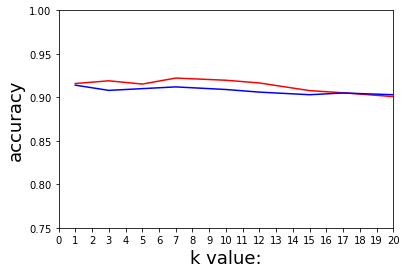

In [14]:

plt.xlabel('k value:',fontsize=18)
plt.ylabel('accuracy',fontsize=18)
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 20)
plt.ylim(0.75, 1)
# ,7,10,13,15,1
# k_value=[1,3,5,7,10,12,15,17,20]
scores2=[0.914,0.908,0.910,0.912,0.909,0.906,0.903,0.905,0.903]
plt.plot(k_value,scores1,'r')
plt.plot(k_value,scores2,'b')
plt.show()